## Preprocessing Notebook
---

This notebook is used to preprocess the data before training the model. Since we are dealing with RAW audio, the preprocessing steps are as follows:
1. [Set the paths](#set-the-paths)
2. [Check the presence of corrupted files](#check-the-presence-of-corrupted-files)
3. [Structure the data in a proper way to standardize feature extraction](#structure-the-data)
4. [Resample the audio files to a common sampling rate (if needed)](#resample-the-audio-files)

In [29]:
# needed packages
#%pip install tqdm torch torchaudio ipywidgets shutils

# import all the functions
from utils import *
import pandas as pd
import shutil
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

# -------- tqdm DARK THEME --------

### 1. Set the paths

In [31]:
# set the paths
BASE_DIR = '../dataset/'
FULL_DATA_DIR = BASE_DIR + 'audio/'
CORRUPTED_DIR = BASE_DIR + 'audio/corrupted/'
METADATA = BASE_DIR + 'metadata.csv'
ANNOTATION = BASE_DIR + 'annotation.csv'
LABELS = BASE_DIR + 'labels.csv'

# paths of restrucutred data
ARTIFACTS_DIR = BASE_DIR + 'artifacts/'
EXTRAHLS_DIR = BASE_DIR + 'extrahls/'
MURMURS_DIR = BASE_DIR + 'murmurs/'
NORMALS_DIR = BASE_DIR + 'normals/'
EXTRASTOLES_DIR = BASE_DIR + 'extrastoles/'

### 2. Check the presence of corrupted files

In [32]:
count, names = move_corrupted_files(FULL_DATA_DIR, CORRUPTED_DIR)

Checking files:   0%|          | 0/662 [00:00<?, ?it/s]

mv: rename ../dataset/audio/corrupted to ../dataset/audio/corrupted/corrupted: Invalid argument


File corrupted is corrupted
Files corrupted in ../dataset/audio/:	1



### 3. Structure the data

In [33]:
metadata = pd.read_csv(METADATA)
annotation = pd.read_csv(ANNOTATION)
labels = pd.read_csv(LABELS)
audio_info= pd.merge(metadata, labels, on='filename')

unique_labels = pd.unique(labels['label'])
print(unique_labels)


['artifact' 'extrahls' 'murmur' 'normal' 'extrastole']


In [34]:
# create a directory for each label and copy the files

DIRS = [ARTIFACTS_DIR, EXTRAHLS_DIR, MURMURS_DIR, NORMALS_DIR, EXTRASTOLES_DIR]

for i, label in enumerate(unique_labels):
    audio_info_filt = audio_info[audio_info['label'] == label]['filename']
    names_list = audio_info_filt.to_list()
    
    # create the directories
    os.makedirs(DIRS[i], exist_ok=True)
    
    # copy the files
    for name in names_list:
        shutil.copy(FULL_DATA_DIR + name, DIRS[i] + name)
    

### 4. Resample the audio files

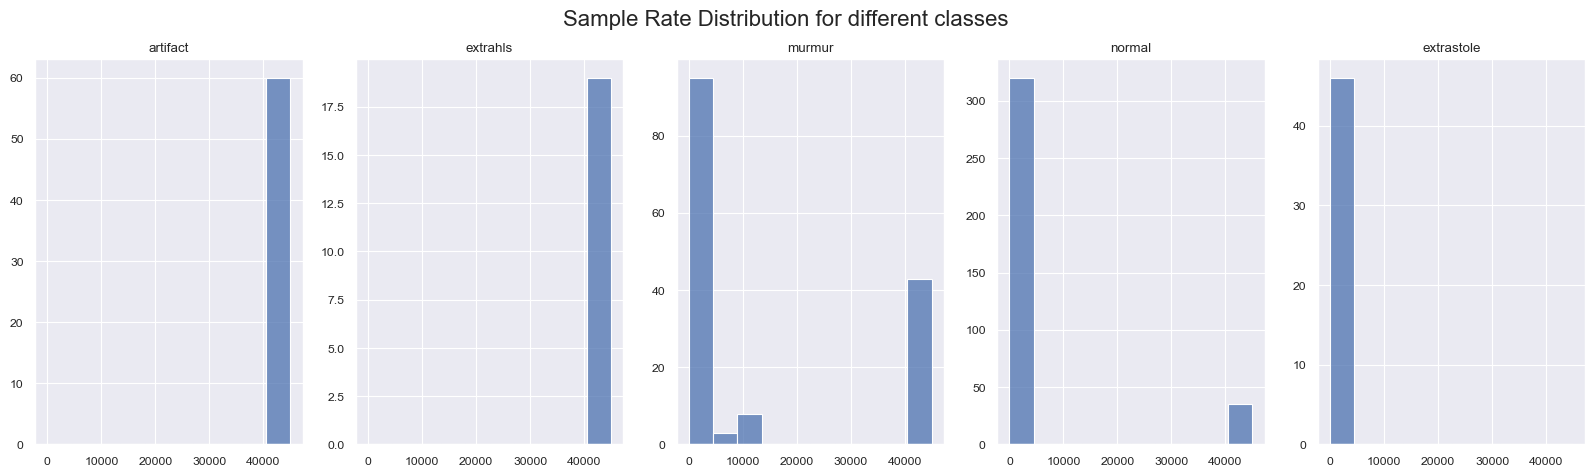

In [35]:
# check the sample rate distribution for each class

unique_labels = audio_info['label'].unique()
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
sns.set_theme(context="paper", font_scale=1)
for i, label in enumerate(unique_labels):
     audio_info_tmp = audio_info[audio_info['label'] == label]
     sns.histplot(audio_info_tmp['sample_rate'], ax = axs[i], bins=10, binrange=(0, 45000))
     axs[i].set_title(label)
     axs[i].set_xlabel('')
     axs[i].set_ylabel('')
     fig.suptitle('Sample Rate Distribution for different classes', fontsize=16)